# MP Workshop - Part 1

This notebook contains codes that generate the figures in the MP workshop.

The code is not well maintained and only used for references.

The first part of codes are used to explain the Kernel Ridge Regressions;

The second part of codes are used to explain the Via-points Movement Primitives.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
traj = np.loadtxt('traj.csv', delimiter=',')

### 1. Kernel Ridge Regression
#### a. Linear Regression


In [8]:
y = traj[0:traj.shape[0]:3,0]
t = np.linspace(0, 1, len(y))
z = np.ones(len(y))
A = np.transpose(np.stack([t, z]))
m, c = np.linalg.lstsq(A, y, rcond=None)[0]


fig = plt.figure(figsize=(12,6))
plt.plot(t, y, 'b.', markersize=5)
plt.plot(t, m*t+c, 'r-', linewidth=3)
plt.title('X Dimension')
plt.xlabel('time')
plt.ylabel('X')

Text(0, 0.5, 'X')

#### b. Kernel Ridge Regression: Special Case


Text(0, 0.5, 'X')

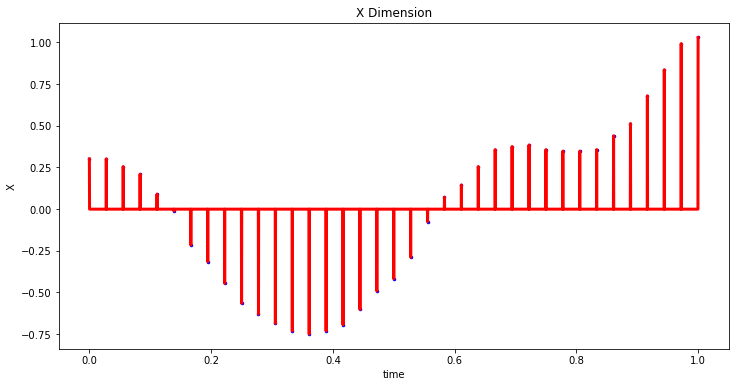

In [9]:
def delta(t0, c):
    res = np.zeros(shape=(len(c),))
    for i in range(len(c)):
        if t0 == c[i]:
            res[i] = 1
    
    return res


c = t
w = y
def f_delta(t0):
    res = np.zeros(shape=(len(t0), 1))
    for i in range(len(t0)):
        df = delta(t0[i], c)
        res[i] = df.dot(w)
    
    return res


def expand(te, num):
    res = []
    for i in range(len(te)-1):
        res.append(te[i])
        res.extend(np.linspace(te[i], te[i+1], num))
        
    res.append(te[-1])
    return res



fig = plt.figure(figsize=(12,6))
plt.plot(t, y, 'b.', markersize=5)
te = expand(t, 100)
plt.plot(te, f_delta(te), 'r-', linewidth=3)
plt.title('X Dimension')
plt.xlabel('time')
plt.ylabel('X')

#### c. Kernel Ridge Regression: Radial Basis Functions

In [10]:
knum = 5
def rbf(t, c, sig2):
    return np.exp(- (1/(2 * sig2)) * (t - c) ** 2)

def RBF(ts, c, sig2):
    Phi = []
    for t in ts:
        a = rbf(t, c, sig2)
        Phi.append(rbf(t, c, sig2))
    
    return np.stack(Phi)

centers = np.linspace(0, 1, knum)
sig2 = (.1)**2
te = np.linspace(0, 1, len(y))
Phi = RBF(te, centers, sig2)
w = np.linalg.lstsq(Phi, y, rcond=None)[0]


def f_rbf(t):
    m = RBF(t, centers, sig2)
    return m.dot(w)


colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
def plot_all_kernels():
    tt = np.linspace(0, 1, 1000)
    for i in range(len(centers)):
#         plt.plot(tt, w[i] * rbf(tt, centers[i], sig2), '-.', color=colors[i], linewidth=2)
        plt.plot(tt, rbf(tt, centers[i], sig2), '-.', color=colors[i], linewidth=2)
    

fig = plt.figure(figsize=(12,6))
# plt.plot(tt, f_rbf(tt), 'r-', linewidth=3)
plot_all_kernels()
tt = np.linspace(0, 1, 1000)
plt.plot(t, y, 'b.', markersize=5)
plt.title('X Dimension')
plt.xlabel('time')
plt.ylabel('X')
plt.ylim([-0.8, 1.2])

(-0.8, 1.2)

### 2. VMP Explanation


In [11]:
def const(t, c):
    return c * np.ones(t.shape)

def xi(t):
    return  np.sin(3 * t) + np.cos( 0.5 * t) + 2 * t

def h(t, y0, g):
    return y0 + (g - y0) / 2 * t 

g = xi(2)
y0 = xi(0)

def f(t):
    return xi(t) - h(t, y0, g)

def nxi(t, ny0, ng):
    return h(t, ny0, ng) + f(t)

def plot_f(ts, y_, g_):
    for ti in ts:
        xi_y = h(ti, y_, g_) + f(ti)
        h_y = h(ti, y_, g_)
        ys = np.linspace(xi_y, h_y, 100)
        plt.plot(ti * np.ones(ys.shape), ys, 'r-.')

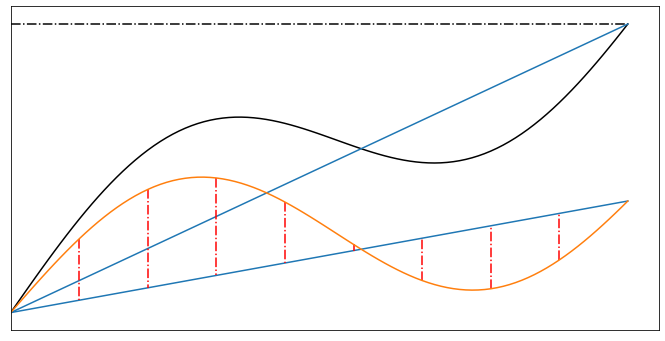

In [12]:
t = np.linspace(0, 2, 100)
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1
ax.plot(t, xi(t), 'k-')
plt.plot(t, const(t, g), 'k-.')
plt.plot(t, h(t, y0, g))
# plot_f(np.linspace(0, 2, 10), y0, g)
# plt.plot(t, nxi(t, y0, g-2), 'g-')
# plt.plot(t, const(t, g-1), 'g-.')

plt.plot(t, h(t, y0, g-2), 'C0')
plot_f(np.linspace(0, 2, 10), y0, g-2)
plt.plot(t, nxi(t, y0, g-2), 'C1')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([0,2.1])
ax.set_ylim([xi(0)-.2,xi(2)+.2])
plt.savefig('fig7.jpg',bbox_inches='tight', dpi=150)